# 8/12일 정리

- 데이터에 대한 이해 (탐색과 전처리 상당히 필요())
- 인사이트 도출 필요.. 무엇을 할지 어떤 추천 방법을 할지
- user와 Product의 정확한 relationship 확인 필요
- 방향성 정의

# 0. 데이터 업로드

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt

from kmodes.kprototypes import KPrototypes
from sklearn.manifold import TSNE

from plotnine import *
import plotnine

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir('./data')

['DB_data',
 'JA_data',
 'n_prod_view_log.csv',
 'n_search_log.csv',
 'n_user_info_member.csv']

In [13]:
# 전체유저, User Demographic, User profiling : 50,172 명
n_user_info_member = pd.read_csv('./data/n_user_info_member.csv')

# 검색기록  262,372 건 키워드검색
n_prod_view_log = pd.read_csv('./data/n_prod_view_log.csv')

# 검색기록 160,552 건
n_search_log = pd.read_csv('./data/n_search_log.csv')

In [22]:
new_user_info_member = n_user_info_member[n_user_info_member['member_id'].notna()]

In [26]:
new_user_info_member[new_user_info_member['fcm_token'].isna()]

,member_id,fcm_token,skin_type,gender,birth_year,skin_tone,personal_color,worry_1,worry_2,worry_3,worry_4,worry_5,worry_6,worry_7,worry_8,worry_9,worry_10,worry_11,worry_12,beauty_level
41,SDNQV2NWOF9OTkdmT1pnOGJ6Q0g4RHhWZTUxcnhxWDFJTF...,NaN,2,F,2008,4,1,1,0,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN


In [8]:
n_user_info_member.head(10)

,member_id,fcm_token,skin_type,gender,birth_year,skin_tone,personal_color,worry_1,worry_2,worry_3,worry_4,worry_5,worry_6,worry_7,worry_8,worry_9,worry_10,worry_11,worry_12,beauty_level
0,MlRwTkpBOHdmd1pHeVFGZDBnSkRvSm5fQ1FaekNGQ2NRVD...,APA91bG7s7Vmq2MRcJ6XdeWNkch1ZBHq_HGVW3OOfQ8h4m...,2,F,2010,2,1,1,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN
1,WUZwWnFPcFA4TXJ2aHlxdU43aEYxVDltVEtVeVUwWTZzek...,APA91bEIICGY0ERbn7rpinIZHAV9EQHUkZu-0loJk_O4Yc...,4,F,1980,4,1,0,0,1,1,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN
2,X0RUZHM0bHVRdmdTU1N6WFdvdkdQbnFzS3o3OHFLeEQzMk...,APA91bHttKhiQJF3MRc88kBRVJYrvatxifsJ-4Kv9H3kU0...,4,F,2007,4,1,1,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,NaN
3,M3NuTWRYWVREeU5zWE5xWVpYOHJkUGpkRUVDa2dpS3A1aE...,coVh6geWV0VXt49xUDKrqe:APA91bF8OqR3URL5mt6Sk7B...,3,F,1999,2,3,1,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,Qjlncm5RaUNEb0ZzZmxFMW9CTWVlb0xaazRCRVZqMU4tdE...,APA91bGgi9jc-vd5ofry4s0grJIPNrs9FFysMV83hFPYYn...,2,M,2002,4,2,0,0,1,1,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN
5,S3JxcW96SHZpMHFGQkduNXlkTlF6eWxfZ2pxM1hpVVM0R0...,APA91bEeyeOHFpiToYnSIFz6tjY6C0v_SSmMewgs_Y0Npn...,1,M,1978,1,2,0,0,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
6,RkNKdkxGeHZnXzRvQ25TUDQ4a25zZE90aTZ6Ml9hZ2FHLT...,APA91bEMCJle4Vyl3XpiCY8dJuLBqdJkdnTUaC2tuMlFI6...,2,F,1984,1,2,1,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
7,LU1JTm5rSGZoOTBKM0Q4Zy1DSVRveGI4NFJfY3JoejRaWV...,cHTnGlIF4EWIpgWQ04EzV1:APA91bHuBfyhG_xWYxNWqyx...,3,F,1995,1,4,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
8,aWdXOVdTUC1sbEFST1dFWGxHaHpFOVZ4V20tWlkxRGpZb3...,APA91bGd_sGxwVWYOUFKhpUJgbwMbQmpX0hfJfD43t8XSQ...,2,F,1998,4,3,0,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
9,azdjdzFTTkRtZnVWbVFkZmFMVG5icnpqMzk0QW9YVVJQXz...,APA91bGVl36koxbPTFZrB8Zs-XC-L-CbG5SLpTP4BLHz0s...,3,F,2006,4,3,1,0,1,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN


In [7]:
n_user_info_member.tail(10)

,member_id,fcm_token,skin_type,gender,birth_year,skin_tone,personal_color,worry_1,worry_2,worry_3,worry_4,worry_5,worry_6,worry_7,worry_8,worry_9,worry_10,worry_11,worry_12,beauty_level
50162,NaN,APA91bHAwxoKIHeqSTN2E47DVIRVbyKJnulhzbHTSe_sll...,4,F,1996,NaN,NaN,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
50163,NaN,APA91bE8FwpcE0nYAZLQA9Hp37k7nj6fCzf5B3r23CLHHO...,1,F,2011,NaN,NaN,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
50164,NaN,APA91bGDqKRPubMH_qQuxjRo0cKZiE5vdtn546IETwQxhS...,4,F,2010,NaN,NaN,1,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
50165,NaN,APA91bFJ2gVKZ39uLdDD9uulGpsbtKNs94fDulmdB5NBks...,2,F,1997,NaN,NaN,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
50166,NaN,APA91bH6w3SAKFc2Ld9JYb7GnSI8MMjMcrLNGlg8bNInNp...,2,F,1993,NaN,NaN,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
50167,NaN,APA91bETc-7ubv0FNOytq8IhQ_t4KfajpHc1KdlGTjFfaS...,2,M,1995,NaN,NaN,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
50168,NaN,APA91bEi04RS6__wzIl4YtDHFrpDZP3dT5_abxqGH41rjr...,4,F,2006,NaN,NaN,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
50169,NaN,eqVy7vsKzQI:APA91bHQ6_sjM26tbyPhv0e0TRZWhDxGnl...,2,F,1993,NaN,NaN,1,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
50170,NaN,APA91bGOdyRxTHQHMoACWyUvPpuzP-D3wyOBtyP-uke5TU...,3,F,1982,NaN,NaN,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
50171,NaN,APA91bETfUcMTHALBr6i-BO_K8bhzJ8pFMbDWFlO4wV7rC...,3,F,1989,NaN,NaN,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
n_user_info_member

In [9]:
# member_id + fcm_token 병합 함수
def set_id(data):
    df = data.copy()
    df['fcm_token'].fillna('NA', inplace = True)
    df['member_id'].fillna('NA', inplace = True)
    
    df['member_id'] = df['member_id'] + '_' + df['fcm_token']
    
    df.drop(['fcm_token'], axis = 1, inplace = True)
    df.rename(columns = {'member_id' : 'ID'}, inplace = True)
    return df

n_user_info_member, n_prod_view_log, n_search_log = set_id(n_user_info_member), set_id(n_prod_view_log), set_id(n_search_log)

In [10]:
n_user_info_member.skin_tone.replace('         ', '0', inplace = True)
n_user_info_member.skin_tone.fillna('0', inplace =True)

n_user_info_member.personal_color.replace('              ', '0', inplace = True)
n_user_info_member.personal_color.fillna('0', inplace =True)
n_user_info_member.drop('beauty_level', axis =1 , inplace = True)
n_user_info_member.head()

,ID,skin_type,gender,birth_year,skin_tone,personal_color,worry_1,worry_2,worry_3,worry_4,worry_5,worry_6,worry_7,worry_8,worry_9,worry_10,worry_11,worry_12
0,MlRwTkpBOHdmd1pHeVFGZDBnSkRvSm5fQ1FaekNGQ2NRVD...,2,F,2010,2,1,1,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,WUZwWnFPcFA4TXJ2aHlxdU43aEYxVDltVEtVeVUwWTZzek...,4,F,1980,4,1,0,0,1,1,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,X0RUZHM0bHVRdmdTU1N6WFdvdkdQbnFzS3o3OHFLeEQzMk...,4,F,2007,4,1,1,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,M3NuTWRYWVREeU5zWE5xWVpYOHJkUGpkRUVDa2dpS3A1aE...,3,F,1999,2,3,1,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Qjlncm5RaUNEb0ZzZmxFMW9CTWVlb0xaazRCRVZqMU4tdE...,2,M,2002,4,2,0,0,1,1,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [11]:
n_user_info_member.tail()
'       '
'1995           '

,ID,skin_type,gender,birth_year,skin_tone,personal_color,worry_1,worry_2,worry_3,worry_4,worry_5,worry_6,worry_7,worry_8,worry_9,worry_10,worry_11,worry_12
50167,NA_APA91bETc-7ubv0FNOytq8IhQ_t4KfajpHc1KdlGTjF...,2,M,1995,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50168,NA_APA91bEi04RS6__wzIl4YtDHFrpDZP3dT5_abxqGH41...,4,F,2006,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50169,NA_eqVy7vsKzQI:APA91bHQ6_sjM26tbyPhv0e0TRZWhDx...,2,F,1993,0,0,1,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50170,NA_APA91bGOdyRxTHQHMoACWyUvPpuzP-D3wyOBtyP-uke...,3,F,1982,0,0,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50171,NA_APA91bETfUcMTHALBr6i-BO_K8bhzJ8pFMbDWFlO4wV...,3,F,1989,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# 클러스터링용 저장
n_user_info_member.to_csv('JA_clustering.csv', index = False)

In [10]:
print("유저 고유 아이디 : ",len(n_user_info_member.ID.unique()))
print("prod_view 고유 아이디 : ",len(n_prod_view_log.product_id.unique()))

유저 고유 아이디 :  50172
prod_view 고유 아이디 :  24309


In [6]:
# 레이블링
user_to_index = {original: idx for idx, original in enumerate(n_user_info_member.ID.unique())}
# user_to_index 
# user_to_index.values()

# n_user_info_member['ID'] = n_user_info_member['ID'].map(lambda x : user_to_index[x])
# n_prod_view_log['ID'] = n_prod_view_log['ID'].map(lambda x : user_to_index[x])
# n_search_log['ID'] = n_search_log['ID'].map(lambda x : user_to_index[x])

- n_user_info_member에는 존재하나 n_prod_view_log와 n_search_log에 존재하지 않아 실패
- 따라서, n_user_info_member를 기준으로 고유 유저를 확인하고자 함.

In [7]:
# 전체 데이터 shape
print(n_user_info_member.shape, n_prod_view_log.shape, n_search_log.shape)

# 각 서치 별 사용자 수 : 5만명의 유저가 있으나, 실 사용자는 2만, 1만명 정도.
total_num = len(n_user_info_member['ID'].unique())
prod_num = len(n_prod_view_log['ID'].unique())
search_num = len(n_search_log['ID'].unique())

prod_id = n_user_info_member[n_user_info_member['ID'].isin(n_prod_view_log['ID'])]
search_id = n_user_info_member[n_user_info_member['ID'].isin(n_search_log['ID'])]

# n_prod_view_log
print('prod_view는 {}명의 고유 유저가 사용'.format(prod_num))
print('단, n_user_info_member에 존재하는 profile 은 {}명'.format(len(prod_id)))
print('\n')


# n_search_log
print('search_view는 {}명의 고유 유저가 사용'.format(search_num))
print('단, n_user_info_member에 존재하는 profile 은 {}명'.format(len(search_id)))

(50172, 19) (262372, 3) (160552, 3)
prod_view는 38434명의 고유 유저가 사용
단, n_user_info_member에 존재하는 profile 은 23558명


search_view는 26398명의 고유 유저가 사용
단, n_user_info_member에 존재하는 profile 은 15131명


- prod_view는 50,172의 고유 유저가 있음.
- n_prod_view_log는 38,434의 고유 유저가 있음. 그 중 User_profile이 조회되는 23,558명으로 확인
- n_search_log는 26,398의 고유 유저가 있음. 그 중 User_profile이 조회되는 15,131명으로 확인
- 누락되었는가? 이를 확인해보고 오류인지, 삭제할지, 다시 복원할지 검토 필요

# 1. n_user_info_member

In [8]:
print(n_user_info_member.shape)
n_user_info_member.head()

(50172, 19)


,ID,skin_type,gender,birth_year,skin_tone,personal_color,worry_1,worry_2,worry_3,worry_4,worry_5,worry_6,worry_7,worry_8,worry_9,worry_10,worry_11,worry_12,beauty_level
0,MlRwTkpBOHdmd1pHeVFGZDBnSkRvSm5fQ1FaekNGQ2NRVD...,2,F,2010,2,1,1,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN
1,WUZwWnFPcFA4TXJ2aHlxdU43aEYxVDltVEtVeVUwWTZzek...,4,F,1980,4,1,0,0,1,1,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN
2,X0RUZHM0bHVRdmdTU1N6WFdvdkdQbnFzS3o3OHFLeEQzMk...,4,F,2007,4,1,1,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,NaN
3,M3NuTWRYWVREeU5zWE5xWVpYOHJkUGpkRUVDa2dpS3A1aE...,3,F,1999,2,3,1,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,Qjlncm5RaUNEb0ZzZmxFMW9CTWVlb0xaazRCRVZqMU4tdE...,2,M,2002,4,2,0,0,1,1,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN


In [ ]:
n_user_info_member

In [12]:
n_user_info_member.skin_tone.value_counts()

0    45002
4     2638
2     1383
1      875
3      274
Name: skin_tone, dtype: int64

In [24]:
n_user_info_member.personal_color.value_counts() 

1                 2175
                  1881
3                 1418
2                  841
4                  736
Name: personal_color, dtype: int64

In [23]:
n_user_info_member.skin_tone.unique()

array(['2', '4', '1', '         ', '3', nan], dtype=object)

#### 유저 정보(User-profile)
- NA값이 있는데, 병합 필요(skin_tone, personal_color(43,121), beauty_level(7,051))
- ID 정리되면 레이블 인코딩 필요
- worry에 대한 dummies 변수 이해 필요
- 모두 Categorical Column 임


# 2. n_prod_view_log

In [9]:
print(n_prod_view_log.shape)
n_prod_view_log.head()

(262372, 3)


,view_log_id,ID,product_id
0,11851,NA_APA91bEMDOS1fu_SuxGjLyR5LvMRQHnL9U8n4GJ41Fg...,3277
1,156,NA_en-zMRbZZss:APA91bHzlQHP_QOBDJIUa_gvJGDh2hT...,584
2,38473,NA_WEB155858772587752574111,7579
3,38477,NA_dvb_QYEEUiI:APA91bEUdW9DUqwQvod_NJ2CIEY3kYl...,6415
4,352,NA_cyR3U4v3Dpw:APA91bEnwL88vLIq_VIjceb4GJmUuwz...,3544


- 38,434의 유저가 262,372번을 검색함
- 유저(ID)가 검색한 product_id를 의미함
- view_log_id가 무엇을 의미할까..?

#### Product_id 별 Count 수

In [10]:
view_product_count = pd.DataFrame(n_prod_view_log.groupby('product_id')['ID'].count())
view_product_count.sort_values('ID', ascending = False)[:10]

,ID
product_id,
2816,6573
6614,4788
3451,3780
8641,3755
3992,2331
3187,2013
4585,1752
9395,1682
4095,1574


- 아이템이 몇번 검색을 당했는지에 대한 횟수, 해당 아이템의 인기도라 볼 수 있겠지만, 추천의 불균형(?)으로 이어질 수 있나?
- 중복을 제거할지, 아니면 그 수치를 관심의 대상으로 확인할지.
- 우리의 목표는 user-profile을 기준으로, 비슷한 유저 성향의 검색 기록을 추천이 목표 
- 별점/평가와 같은 ratings이 없으므로, 해당 고객이 특정 product를 조회했을 때 라고 정의해야하나?

#### ID 별 검색 수 

In [11]:
view_id_count = pd.DataFrame(n_prod_view_log.groupby('ID')['product_id'].count())
view_id_count.sort_values('product_id', ascending = False)[:10]

,product_id
ID,
NA_d2Ic57icDq4:APA91bFsEFVfjiepmrQYMwPcKrBGdrKNub8qFn7lvLazzG6Zz1nNhDLPExdgzqexVM5ecnCczO-WLKEsoX23BU6kTax-N-nWU1G_8cq1ZY-Oc5RBV1u22RP-fGRn84c9IpENzzWXZAZn,7887
NA_cAD492TjWV0:APA91bEKPznKWCpccFkVEghZkAH-GCPRgWj3RIKd-__UdxdjJEXcmb3r94EahAkcz4c1viV_I0ZGqmdFTNTy85E4-xRXkRMmH8Ji-yeeP7T-8cA4gISjULfJUxPvk8dawbf8k_RgTpOo,6243
Ym4tMlNxbVIyUVBNeTNuRWlPamNLSDJRM0JqQ3BmejRnMUhUQUhZOG03OA==_NA,3273
SnBkS1RhMFJJQ2RTaE9zNTRlMXQwNjh3bXBKWkdhRUUzRUtvaFBsb2dWQQ==_NA,2661
NA_APA91bHpqTJ0UNSjKuHFRieveuzsxP6Lu96zLjLCjyR_a_xi_PPEkKek7rGUIs4rBFfnEqcYNDA6LZH1nA2KXwtYRlRvUYPGJdz0QVAsY13EP7hWGncJ064zQ-Pk3MjvewpHABy5Icgd,2152
Z0RMejhsX1o0TkMtZnNjRjMweDgyRl9lMURycWRteTUtYlJaZ3hDWUNrdw==_NA,1782
NA_NA,1493
NA_APA91bH_rdJFCVtZWEVmOfdSPExetAEwf6P6wxaxu2yKgpx0SLO6LD0EQNWUWzEbMFBiCi7XyzxL9QK7FV-DbWhj2AI4-A1RZozG2Q41iNKAio-U6lBB2z65aRbQnXl2Yebg5uPHFXQ2,1402
NA_APA91bGxExD-BAPDTvbK9G5kTQQszOJdzft6bRm5oDzeywLPENAGR1q2lfo5qoRE0-XT15QY_EoW87qraHsJwMJBDVxcFjxrjC9q4YCX-CyoTfTCg5frPoe-WeQ40J2yvQwvJM2l8Z0z,1176


<AxesSubplot:xlabel='product_id', ylabel='Density'>

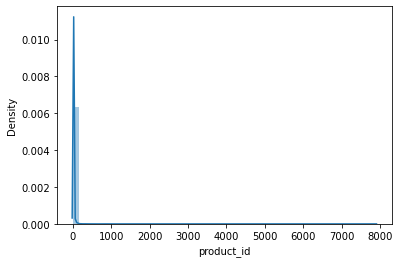

In [12]:
sns.distplot(view_id_count['product_id'])

- 대부분의 유저가 검색의 수가 적음 (이는 당연한 소리)
- 검색횟수가 1, 3, 5 등 고객의 관심을 나타내는 제품과 상관없는 것으로 제거 해야함. (불확실성)

# 3. n_search_log

In [13]:
print(n_search_log.shape)
n_search_log.head()

(160552, 3)


,search_log_id,ID,product_id
0,50,NA_WEB155003426473567085,21
1,41,NA_cuyKQkTcczs:APA91bE80C-H_h_3Z5pJ5ddyeyEmd1A...,2404
2,42,NA_WEB155003422116939721,115
3,43,NA_ea9DPkQhseY:APA91bHutWbBEh9wC_pgjXFCiUmnwRf...,2671
4,44,NA_cuyKQkTcczs:APA91bE80C-H_h_3Z5pJ5ddyeyEmd1A...,459


- 26,398의 유저가 160,552번을 검색함
- 유저(ID)가 검색한 product_id를 의미함
- search_log_id 무엇을 의미할까..?

In [14]:
# Product_id 별 Count 수
search_product_count = pd.DataFrame(n_search_log.groupby('product_id')['ID'].count())
search_product_count.sort_values('ID', ascending = False)[:10]

,ID
product_id,
,95267
2816,1605
4585,674
20471,563
22589,541
22595,433
5801,419
2786,376
30436,250


- product_id가 없는 것을 확인, n_search_log가 이미지 였다면 오류라고 볼 수 있겠음. - 삭제
- n_prod_view_log와 n_search_log를 다르게 접근하여 rating을 만들 수 있을까?
- 그니까, 1) 이미지 기반 데이터의 추천, 2) 키워드검색의 추천, 3) 양자를 결합한 추천

In [15]:
# ID 별 검색 수 
search_id_count = pd.DataFrame(n_search_log.groupby('ID')['product_id'].count())
search_id_count.head()

,product_id
ID,
LS1FMWJ3cG5qaVRWdzBQQWlnZkl3SGowdUpMWXFKTmwyZlhlMnNJVzZtZw==_NA,2
LS1KM3Q3LTZWeFItY05NbEM2XzNXX1VLdlFIdzdSRDVJSFpZUUZkeDd3NA==_NA,3
LTB6VUFMM1RncHNRNEZWbkI4NXlnSXpKNEFnVnJSTzNhdHQ1SXEzT21yWQ==_NA,1
LTBDR2FkbUFPLTFuY2lmYkNXQVJ5U1liU1liVllETTlfTFp2bW44N2Vadw==_NA,2
LTBWSktrWWcwTkY4bWNCTWYzOFZhelJxQmtBeGgzMUhxMFJCbVZCZjd6dw==_NA,7


<AxesSubplot:ylabel='Density'>

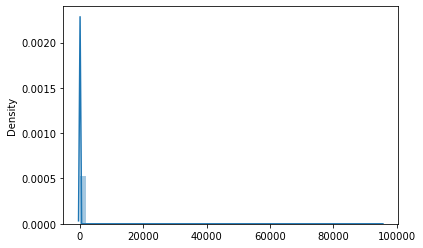

In [16]:
search_product_count['ID'].value_counts()[:30]
sns.distplot(search_product_count)

### 정리

- user에 대한 profiling information이 있음 -> User-based Neural Collaborative Filtering
- Neural Collaborative Filtering을 하기 위해서 rating Matrix 형태로 전환해야함


- Row : 고객 ID, Col : Product_id, Value : 필터링한 조회여부(?), 논문찾아봐야할듯 -> 
- 단순히 검색을 했다고 추천하기는 bias가 있을 것 같은데.. 어느정도 필터링? 고민.
- Matrix Factorization 대신 AutoEncoder ?
- Deep FM(Wide & FM) :: 고객세그먼트(Clustering) => Wide & rating Matrix => FM 


- 참고 : 유튜브는 평점, 별점이 아닌 시청기록으로 추천함. 즉, 서치해본 아이템을 대상으로 비교할 수 있겠음. 


- 비즈니스 관점(?)을 통한... ~ 이론을 근거.. strong해지기.. 음..
- searchlog 2 종류에서 검색기록, 촬영기록을 나누어서 분류 추천할 수 있지 않을까?
- 예시) (1) 언택트 : 촬영으로 검색, (2) 이게 아니면 그냥 검색함

# 데이터 탐색

## 1. 데이터 전처리

In [124]:
JA_cluster = pd.read_csv('JA_clustering.csv')

In [ ]:
for i in JA_cluster.columns:
    print("###### {}의 유니크 값 확인 ######".format(i))
    print(Cluster_data[i].unique())

In [125]:
# 띄어쓰기 제거
JA_cluster['birth_year'].replace('          ', '0', inplace = True)
JA_cluster['skin_type'] = JA_cluster['skin_type'].replace('         ', 0)
JA_cluster['gender'] = [i.strip() for i in JA_cluster['gender']]

# birth_year -> int변환
JA_cluster['birth_year'] = JA_cluster['birth_year'].astype('int')
# JA_cluster['birth_year'].unique()

# 이상치 확인
print("2020년생이후 출생 : ", (JA_cluster['birth_year'] > 2020).sum())
print("1950년생이전 출생 : ", (JA_cluster['birth_year'] < 1950).sum())

2020년생이후 출생 :  124
1950년생이전 출생 :  136


In [126]:
cond1 = (JA_cluster['birth_year'] > 1950)
cond2 = (JA_cluster['birth_year'] < 2020)
JA_cluster = JA_cluster.loc[cond1 & cond2 ,:]
JA_cluster.shape

(49799, 18)

<AxesSubplot:xlabel='birth_year', ylabel='Density'>

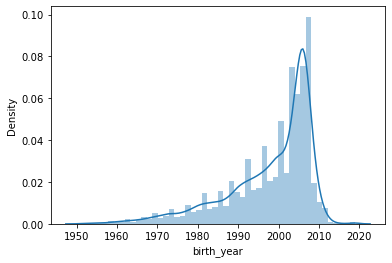

In [127]:
sns.distplot(JA_cluster['birth_year'])

In [225]:
JA_cluster['skin_type'].replace('         ', '0', inplace = True)

## 2. 클러스터링

In [128]:
# object 형 변환
JA_cluster.drop('ID', axis = 1, inplace = True)
Cluster_data = JA_cluster.astype({'skin_type': 'str', 'gender' : 'str'})

# 스케일링 (제외한 변수들에 대해 Minmax 정규화)
numerical_feats = Cluster_data.dtypes[Cluster_data.dtypes != "object"].index.tolist()
Cluster_data[numerical_feats] = MinMaxScaler().fit_transform(Cluster_data[numerical_feats])

# 알고리즘 전처리
catColumnsPos = [Cluster_data.columns.get_loc(col) for col in list(Cluster_data.select_dtypes('object').columns)]

print('Categorical columns           : {}'.format(list(Cluster_data.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

dfMatrix = Cluster_data.to_numpy()

Categorical columns           : ['skin_type', 'gender']
Categorical columns position  : [0, 1]


In [133]:
# 최적 K 탐색 1 ~ 10 클러스터를 통해 비교
cost = []
for cluster in range(1, 11):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0) # init 변경?
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
        
# 클러스터 별 Cost를 데이터 프레임으로 변환        
df_cost = pd.DataFrame({'Cluster':range(1, 11), 'Cost':cost})
df_cost.head(10)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10


,Cluster,Cost
0,1,82271.339250
1,2,67780.786687
2,3,59434.674574
3,4,53364.188938
4,5,49091.989597
5,6,45584.300603
6,7,41972.704720
7,8,39660.676262
8,9,38373.296975
9,10,36285.738500


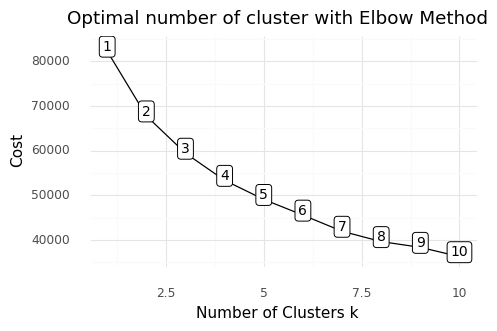

<ggplot: (184386384098)>

In [137]:
# 최적 K를 찾기 위한 Cost 감소 시각화
plotnine.options.figure_size = (5, 3)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [296]:
# 클러스터링 학습
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 42)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([2, 0, 2, ..., 1, 2, 0], dtype=uint16)

## 3. 시각화

In [199]:
Cluster_data['skin_type'] = Cluster_data['skin_type'].replace('         ', 0)
Cluster_data['gender'] = [i.strip() for i in Cluster_data['gender']]

# 성별
gender = {'M' : '0', 'F' : '1'}
Cluster_data['gender'] = Cluster_data['gender'].map(lambda x : gender[x])

Cluster_data = Cluster_data.astype({'skin_type': 'int', 'gender' : 'int'})
Cluster_data.reset_index(drop= True, inplace =True)

In [289]:
def Onehot_enc(data):
    df = data.copy()
    object_col = ['skin_type','gender']

    enc = OneHotEncoder()
    enc.fit(df.loc[:,object_col])
    
    onehot_df = pd.DataFrame(enc.transform(df.loc[:,object_col]).toarray(), columns = enc.get_feature_names(object_col))
    df.drop(object_col, axis=1, inplace=True)
    
    df = pd.concat([df, onehot_df], axis=1)   
    return df

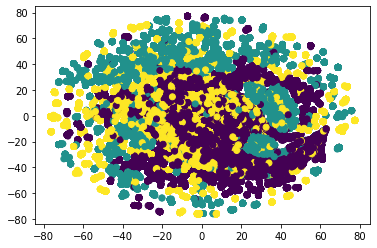

In [297]:
# 차원축소를 위한 원핫인코딩 데이터 생성
cluster_data_onehot = Onehot_enc(Cluster_data) # reset_index 하지 않을 경우 368 null값 확인. 참고

# 2개의 차원으로 축소
transformed = TSNE(n_components=2).fit_transform(cluster_data_onehot)

# 기존 데이터프레임에 레이블 추가
Cluster_data['cluster_id'] = kprototype.labels_

# 라벨은 클러스터별 색상으로 분류
plt.scatter(transformed[:,0], transformed[:,1], c=Cluster_data['cluster_id']) 
plt.show()

# 연습장(삭제)

In [ ]:
encoder = LabelEncoder()
encoder.fit(n_user_info_member['ID'])

n_user_info_member['ID'] = encoder.fit_transform((n_user_info_member['ID']))
# n_prod_view_log['ID'] = encoder.transform(n_prod_view_log['ID'])
# n_search_log['ID'] = encoder.transform(n_search_log['ID'])

#### 레이블링 실패 -> unseen data 확인

In [192]:
def Label_enc(data1, data2, data3):
   
    encoder = LabelEncoder()
    data1['ID'] = encoder.fit_transform(data1['ID'])
    data2['ID'] = encoder.transform(data2['ID'])
    data3['ID'] = encoder.transform(data3['ID'])
    
    return data1, data2, data3

n_user_info_member, n_prod_view_log, n_search_log = Label_enc(n_user_info_member, n_prod_view_log, n_search_log)

#### n_prod_view_log

In [76]:
n_prod_view_log[n_prod_view_log['ID'].isin(prod_id['ID'])]['ID'].duplicated().sum()# 15만명 -> 중복제거 13만rjs

135715

#### n_search_log

In [39]:
n_user_info_member[n_user_info_member['ID'].isin(n_search_log['ID'])]

,ID,skin_type,gender,birth_year,skin_tone,personal_color,worry_1,worry_2,worry_3,worry_4,worry_5,worry_6,worry_7,worry_8,worry_9,worry_10,worry_11,worry_12,beauty_level
23,emtHYzNib25BS2hSRXpidzVOWFpwYXFJMkg0aUhJRThkUD...,4,F,2010,2,3,0,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
104,VUpPbXVnYmxsR0xlTlpINzREdlpoQWpGNGJhWTh5dkZIS2...,3,F,1962,4,2,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
129,YmtmODdmY05SQ2FJQnhZZGI5el8tTzZaclFmTm9EeFM1aj...,2,F,2001,2,3,1,1,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
209,SldpVGpZSjBUcnJ5am45clZYcjBDRWlRNjZnNjl6eG1wdm...,3,F,2004,4,3,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
231,Vm14cTc3c2ZaNk5BdGFlbExWM3h3N1pSTDVqSUVRZWNEem...,1,F,1994,4,2,0,0,0,1,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50157,NA_APA91bFtxbpTP76znecpiGzY7LHcAQsU8lxJXr6uxXi...,2,F,2005,NaN,NaN,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
50158,NA_ep270VBQ2LE:APA91bHM59ucL3-zTQIiIBTFnN5kbRQ...,2,F,1999,NaN,NaN,1,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
50161,NA_APA91bFB73t2pydsaVrqpbYXAfIjh5SJWdszYBUjASL...,1,M,1996,NaN,NaN,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
50165,NA_APA91bFJ2gVKZ39uLdDD9uulGpsbtKNs94fDulmdB5N...,2,F,1997,NaN,NaN,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [139]:
print(n_user_info_member.shape, n_prod_view_log.shape, n_search_log.shape)

n_user_info_member[n_user_info_member['ID'].isin(n_search_log['ID'])].shape
temp2 = n_search_log[n_search_log['ID'].isin(n_user_info_member['ID'])]
temp2.shape

(50172, 19) (262372, 3) (160552, 3)


(83845, 3)